In [30]:
import csv
import ast
from utils.structs import CartonPackage as Package

with open('output_29137.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    packages = []
    for row in csv_reader:
        if row.__len__() > 0:
            packages.append(Package(row[0],row[1],ast.literal_eval(row[2]),ast.literal_eval(row[3]),row[4],row[5],row[6]))


print(packages.__len__())

400


In [ ]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coms = {}
weights = {}

cost = 0
for p in packages:
    if p.ULD == -1 or p.ULD == '-1':
        cost+=float(p.cost)

print(cost)



for p in packages:
    if p.ULD != -1 and p.ULD != '-1':
        if p.ULD not in coms:
            coms[p.ULD] = []
            weights[p.ULD] = []
        com = (p.position[0]+ p.dimensions[0]/2,p.position[1]+ p.dimensions[1]/2,p.position[2]+ p.dimensions[2]/2)
        weights[p.ULD].append(p.weight)
        coms[p.ULD].append(com)

for k in coms.keys():
    coms[k] = np.array(coms[k])
    weights[k] = np.array(weights[k])

print(coms.keys())

14137.0
dict_keys(['U1', 'U2', 'U3', 'U4', 'U5', 'U6'])


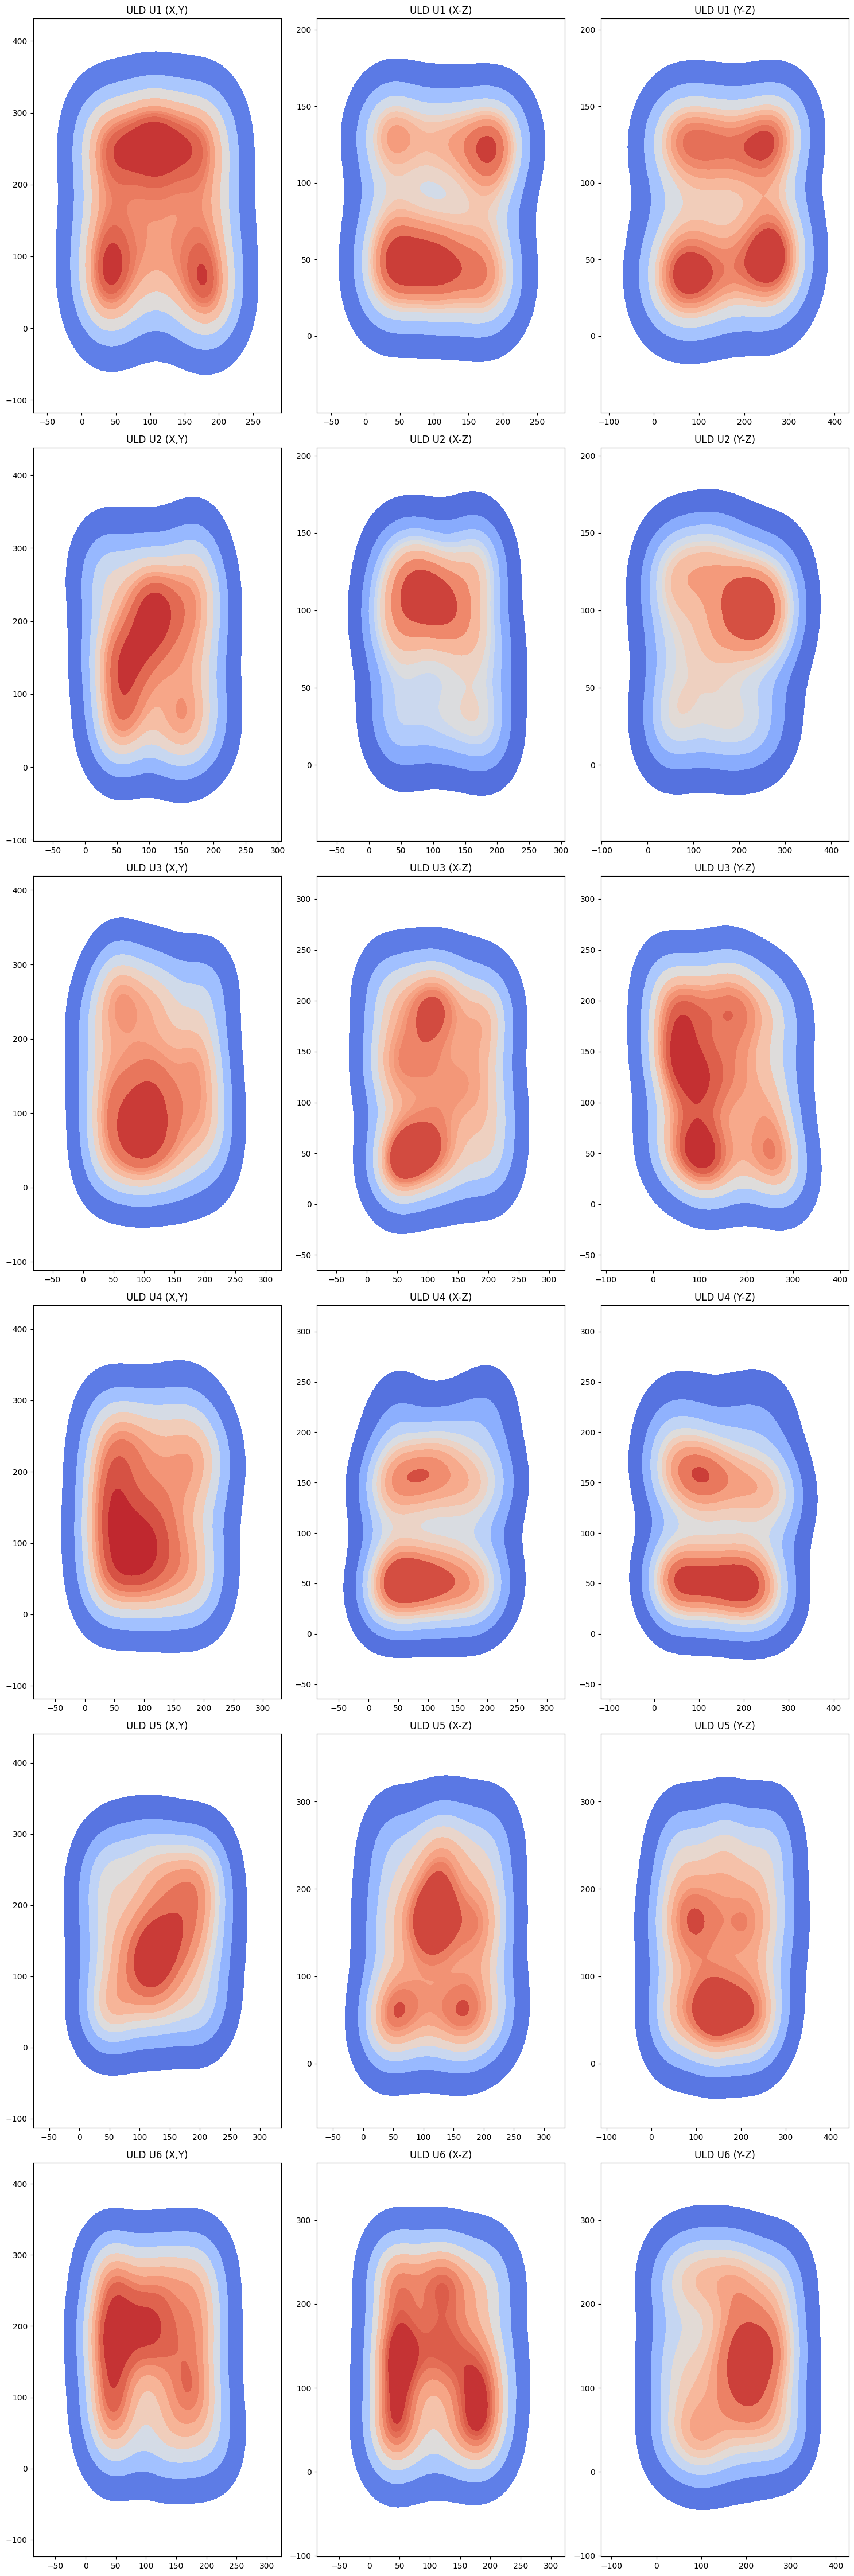

In [32]:
fig, axs = plt.subplots(6, 3, figsize=(15, 45))

i = 0
for key, value in coms.items():
    if i >= 18:
        break
    ax = axs[i // 3, i % 3]
    sns.kdeplot(x=value[:, 0], y=value[:, 1], weights=weights[key], ax=ax, fill=True, cmap='coolwarm', levels=10)
    ax.set_title(f'ULD {key} (X,Y)')
    i+=1
    ax = axs[i // 3, i % 3]
    sns.kdeplot(x=value[:, 0], y=value[:, 2], weights=weights[key], ax=ax, fill=True, cmap='coolwarm', levels=10)
    ax.set_title(f'ULD {key} (X-Z)')
    i+=1
    ax = axs[i // 3, i % 3]
    sns.kdeplot(x=value[:, 1], y=value[:, 2], weights=weights[key], ax=ax, fill=True, cmap='coolwarm', levels=10)
    ax.set_title(f'ULD {key} (Y-Z)')
    i+=1

plt.tight_layout()
plt.show()